# This script is an attempt to make the following figure from Hamilton et al. 2015:

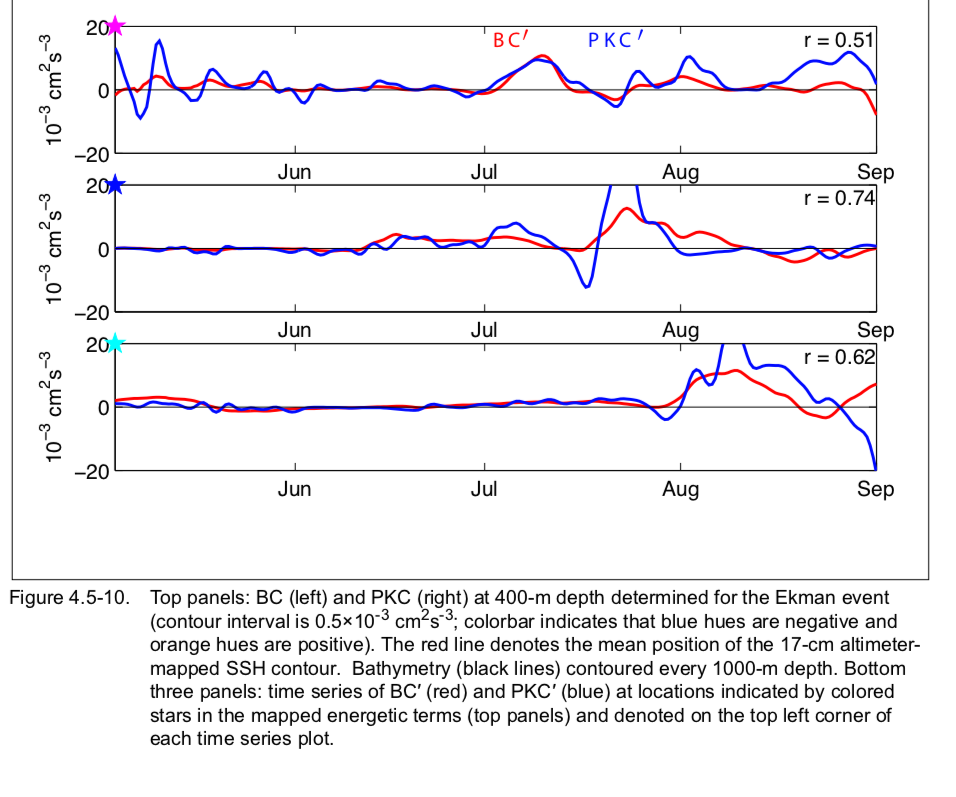

Where the red and blue lines correspond to the conversion of mean potential energy to eddy potential energy (BC), and the vertical down-gradient heat flux (PKC). Hamilton shows that these are the important parts and are defined as:

\begin{equation*}
BC = -\overline{u_{ref}'T'} \cdot \triangledown\overline{T}
\end{equation*}

and

\begin{equation*}
PKC = \overline{w'T'} \theta_z
\end{equation*}

Mean and perturbations are relative to time not space. $u_{ref}' = u - u_{bcb}$

Below a certain depth (here we will use 400 m) the density gradient can be assumed to be depdent on temperature alone: $\rho =\rho_o (1-\alpha T)$, where $\alpha$ is the thermal expansion coefficient $(10^{-4} \:^\circ C^{1})$.

We need vertical velocity $w$ and mean $\theta_z$. Hamilton defines $\theta_z$ as the mean stratification within the array and in the obs this value is 0.023 $^{\circ}C/m$ at 400 m depth. For the moment we will use this value. They follow Lindstrom and Watts (1994) and Howden (2000) to estimate vertical velocity near the base of the thermocline:

\begin{equation*}
w = \frac{\partial Z_6}{\partial t} + u \cdot \triangledown Z_6
\end{equation*}

Here $Z_6$ is the depth of the 6 $^{\circ}$ isotherm and is negative with increasing depth. We will use the model output $w$ at $Z_6$.



### Let's begin

Import all the stuff we will need

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import Nio,Ngl
import os,sys
import datetime



Here are some things that will be sensitive to future uses of this script

In [11]:
  path_to_output = "/scratch/rhe/GoM/Data-Assimilation/jan2009b/"
  #-- open file
  f = Nio.open_file(path_to_output+"instance_0001/roms_posterior_0001_55013.nc","r")
  wks_type = "png"
  wks = Ngl.open_wks(wks_type,"bc_pkc")
  Ngl.define_colormap(wks,"default")         # Change color map.

# Start date and end date
  start_date=datetime.datetime(2009,5,4)
  end_date=datetime.datetime(2009,8,31)

# Note to self: because of the way I've saved the ROMS history files
# there are two times in each one, so the start_date_index returns a file
# with desired date in the second time record, not the first!


Figure out date indices to loop over

In [1]:
  days_since=datetime.datetime(1858,11,17)
  start_date_ordinal=datetime.date.toordinal(start_date)
  end_date_ordinal=datetime.date.toordinal(end_date)
  days_since_ordinal=datetime.date.toordinal(days_since)
    
  start_date_index=start_date_ordinal-days_since_ordinal
  end_date_index=end_date_ordinal-days_since_ordinal
    
  # Optional sanity check
  #start_date_string=datetime.date.fromordinal(days_since_ordinal+start_date_index)
  nfiles=int((end_date_index-start_date_index+1)/2)
  filesi=list(range(start_date_index,end_date_index,2))

NameError: name 'datetime' is not defined

### We will use the ensemble mean rather than any individual member

Need: 

1) mean temperature so we can get its gradient and T'

2) mean w so we can get w'

3) u_ref: - see Fig. 3 here: https://www.sciencedirect.com/science/article/pii/S0377026516300057

-0.0057454022185883385


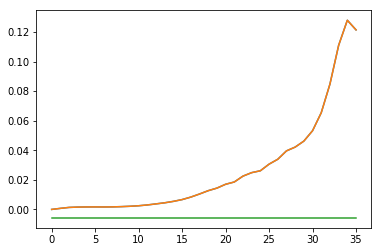

In [146]:
   # for i in range(0,nfiles):
   for i in range(0,1):
    f = Nio.open_file(path_to_output+"analysis_mean."+str(filesi[i])+".nc","r")
    u=f.variables['u']
    v=f.variables['v']
    umagenta=u['i0 : : :']
    vmagenta=v['i0 : : :']
    uref=umagenta
    ubcb = u['i0 i0 : :']
    ubcbmean = np.mean(ubcb)
    ubcbmeanprofile = np.zeros([36])

    for k in range(0,36):
      uref[k,:,:]=umagenta[k,:,:]-ubcb
      ubcbmeanprofile[k] = ubcbmean
    urefmean = np.mean(uref,axis=(1,2))
    utotalmean = np.mean(umagenta,axis=(1,2))
    print(ubcbmean)
    #uref = np.mean((umagenta - umagenta[0 : :]),axis=(1,2))
    #vref = avg(vmagenta - vmagenta[0])
    plt.plot(urefmean)
    plt.plot(utotalmean)
    plt.plot(ubcbmeanprofile)
    plt.show()

    

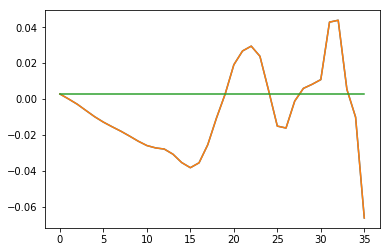

In [143]:
   # Need mean temperature so we can get its gradient and T'
   # Need mean w so we can get w'
   # Need u_ref: - see Fig. 3 here:
   # https://www.sciencedirect.com/science/article/pii/S0377026516300057

   # for i in range(0,nfiles):
   for i in range(0,1):
    f = Nio.open_file(path_to_output+"analysis_mean."+str(filesi[i])+".nc","r")
    u=f.variables['u']
    v=f.variables['v']
    umagenta=u['i0 : 26.5 -86.5']
    vmagenta=v['i0 : 26.5 -86.5']
    uref=umagenta
    ubcb = u['i0 i1 26.5 -86.5']
    ubcbmeanprofile = np.zeros([36])

    for k in range(0,36):
      uref[k]=umagenta[k]-ubcb
      ubcbmeanprofile[k] = ubcb
    #urefmean = np.mean(uref,axis=(1,2))
    #utotalmean = np.mean(umagenta,axis=(1,2))
    #print(ubcbmean)
    #uref = np.mean((umagenta - umagenta[0 : :]),axis=(1,2))
    #vref = avg(vmagenta - vmagenta[0])
    #plt.plot(urefmean)
    plt.plot(umagenta)
    plt.plot(uref)
    plt.plot(ubcbmeanprofile)
    plt.show()
